In [1]:
%matplotlib inline

from IPython.display import Image
from wk3_windygridworld import ExpectedSarsa
from wk3_windygridworld import QLearner
from wk3_windygridworld import Sarsa
from wk3_windygridworld import WindyGridWorld

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# The Game
Shown inset below is a standard gridworld, with start and goal states, but with one difference: there is a crosswind running upward through the middle of the grid. 

The actions are the standard four — `up`, `down`, `right`, and `left` — but in the middle region the resultant next states are shifted upward by a “wind,” the strength of which varies from column to column. The strength of the wind is given below each column, in number of cells shifted upward.

This is an undiscounted episodic task, with constant rewards -1 until the goal state is reached.

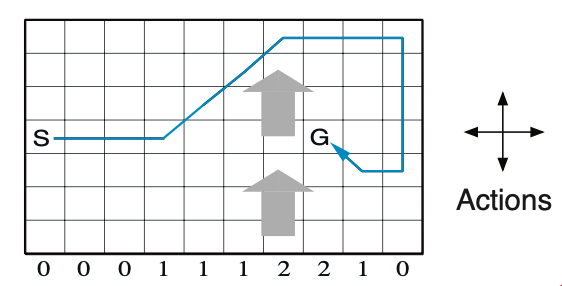

In [2]:
Image('windygridworld.png')

In [3]:
h = 7
w = 10
grid = np.arange(h * w)
grid = grid.reshape(h, w)
print(grid)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]]


In [4]:
def run_episode(agent):
    
    wgw = WindyGridWorld()
    state = wgw.env_start()
    terminate = wgw.reward_state_term[2]
    
    action = agent.agent_start(state)
    
    c = 0
    
    while terminate is False:
        reward, state, terminate = wgw.env_step(action)
        c += 1

        if terminate:
            agent.agent_end(reward)

        else:
            action = agent.agent_step(reward, state)
    
    return c, agent

## Windy Grid World

In [5]:
wgw = WindyGridWorld()
n_states = wgw.grid_h * wgw.grid_w

## Sarsa TD Agent

In [6]:
sarsa_policy = np.ones((n_states, 4)) / 4

sarsa_info = {"policy": sarsa_policy,
              "epsilon": 0.1,
              "discount": 0.9,
              "step_size": 0.5}

sarsa_agent = Sarsa(sarsa_info)

Sarsa policy greedy actions after 125 episodes:


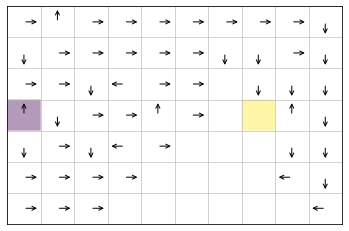

In [7]:
sarsa_steps = [0]
while sum(sarsa_steps) < 8000:
    new_steps, sarsa_agent = run_episode(sarsa_agent)
    sarsa_steps.append(new_steps)
    
sarsa = pd.Series(sarsa_steps)

print(f'Sarsa policy greedy actions after {len(sarsa_steps) - 1} episodes:')
sarsa_agent.plot_grid(wgw.grid_h, wgw.grid_w)

## Q-Learning Agent

In [8]:
qlearning_policy = np.ones((n_states, 4)) / 4

ql_info = {"policy": qlearning_policy,
        "epsilon": 0.1,
        "discount": 0.9,
        "step_size": 0.5}

ql_agent = QLearner(ql_info)

QL policy greedy actions after 156 episodes:


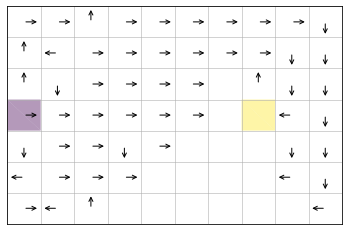

In [9]:
ql_steps = [0]
while sum(ql_steps) < 8000:
    new_steps, ql_agent = run_episode(ql_agent)
    ql_steps.append(new_steps)
    
ql = pd.Series(ql_steps)

print(f'QL policy greedy actions after {len(ql_steps) - 1} episodes:')
ql_agent.plot_grid(wgw.grid_h, wgw.grid_w)

## Expected Sarsa Agent

In [10]:
esarsa_policy = np.ones((n_states, 4)) / 4

esarsa_info = {"policy": esarsa_policy,
               "epsilon": 0.1,
               "discount": 0.9,
               "step_size": 0.5}

esarsa_agent = ExpectedSarsa(ql_info)

Expected Sarsa policy greedy actions after 139 episodes:


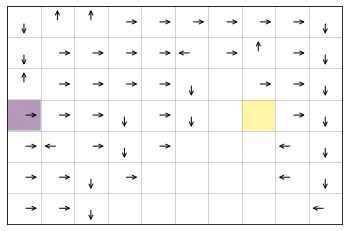

In [11]:
esarsa_steps = [0]
while sum(esarsa_steps) < 8000:
    new_steps, esarsa_agent = run_episode(esarsa_agent)
    esarsa_steps.append(new_steps)
    
esarsa = pd.Series(esarsa_steps)

print(f'Expected Sarsa policy greedy actions after {len(esarsa_steps) - 1} episodes:')
esarsa_agent.plot_grid(wgw.grid_h, wgw.grid_w)

## Comparison

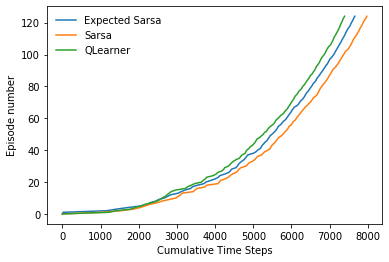

In [12]:
sarsa_xs = np.cumsum(sarsa_steps[:125])
ql_xs = np.cumsum(ql_steps[:125])
esarsa_xs = np.cumsum(esarsa_steps[:125])
ys = np.arange(125)

_ = plt.plot(esarsa_xs, ys)
_ = plt.plot(sarsa_xs, ys)
_ = plt.plot(ql_xs, ys)
_ = plt.xlabel('Cumulative Time Steps')
_ = plt.ylabel('Episode number')
_ = plt.legend(['Expected Sarsa', 'Sarsa', 'QLearner'], frameon=False)

- The increasing slope of the graph shows that the goal was reached more quickly over time.
- The steeper slope associated with the QLearner agent highlights that it learns quicker than either Sarsa agent.
- If we compare the greedy policies of the three agents after 8000 timesteps, we can also see that the Q-Learning algorithm is already closer to the true optimal policy than the other two.
- The expected Sarsa agent learns faster than the Sarsa agent.